BSM call option

In [5]:
from math import log, sqrt,exp
from scipy import stats

class call_option():
    def __init__(self, S0,K,T,r,sigma):
        self.S0 = float(S0)
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        
    def value(self):
        d1=((log(self.S0 / self.K)+(self.r + 0.5*self.sigma**2) * self.T)
           / (self.sigma * sqrt(self.T)))
        d2=((log(self.S0 / self.K)+(self.r - 0.5*self.sigma**2) * self.T)
           / (self.sigma * sqrt(self.T)))
        value = (self.S0 *stats.norm.cdf(d1, 0.0,1.0)
                -self.K * exp(-self.r*self.T) * stats.norm.cdf(d2,0.0,1.0))
        return value
    
    def vega(self):
        d1 = ((log(self.S0 / self.K)
              +(self.r  + 0.5 *self.sigma**2) * self.T)
              /(self.sigma * sqrt(self.T)))
        vega = self.S0 * stats.norm.cdf(d1, 0.0,1.0) * sqrt(self.T)
        return vega
    
    def imp_vol(self, C0,sigma_est=0.2, it=100):
        option = call_option(self.So, self.K, self.T, self.r, sigma_est)
        for i in range(it):
            option.sigma -=(option.value() - C0) / option.vega()
            return option.sigma

In [6]:
o = call_option(100.,105.,1.0,0.05,0.2)
type(o)
print(o)

In [7]:
import numpy as np
maturities = np.linspace(0.05,2.0,20)
strikes=np.linspace(80,120,20)
T,K = np.meshgrid(strikes, maturities)
C = np.zeros_like(K)
V = np.zeros_like(C)
for t in enumerate(strikes):
    for k in enumerate(strikes):
        o.T = t[1]
        o.K = k[1]
        C[t[0],k[0]] = o.value()
        V[t[0],k[0]] = o.vega()

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

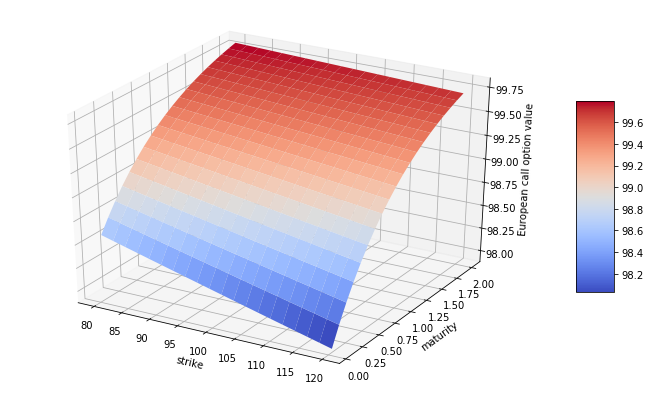

In [9]:
fig = plt.figure(figsize=(12,7))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(T,K,C,rstride=1,cstride=1,
                      cmap = plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('maturity')
ax.set_zlabel('European call option value')
fig.colorbar(surf, shrink=0.5,aspect=5)

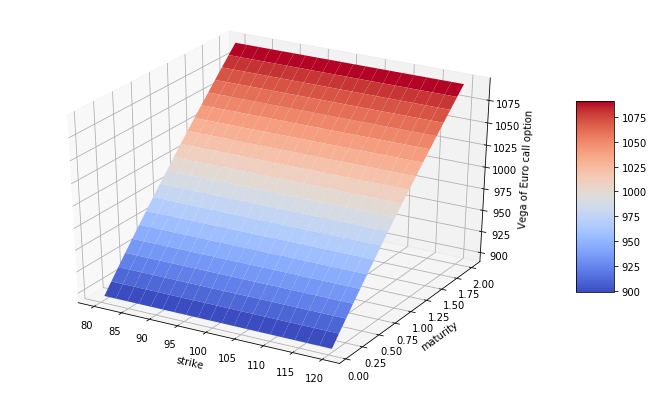

In [10]:
fig = plt.figure(figsize=(12,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T,K,V,rstride=1, cstride=1,
                      cmap = plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('maturity')
ax.set_zlabel('Vega of Euro call option')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()